In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Importing the data

In [2]:
raw_data = pd.read_csv('Index2018.csv')
raw_data.head()

# market indexes

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [3]:
df = raw_data.copy()

## Examining the data

In [4]:
df.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [5]:
df.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

## Plotting the data

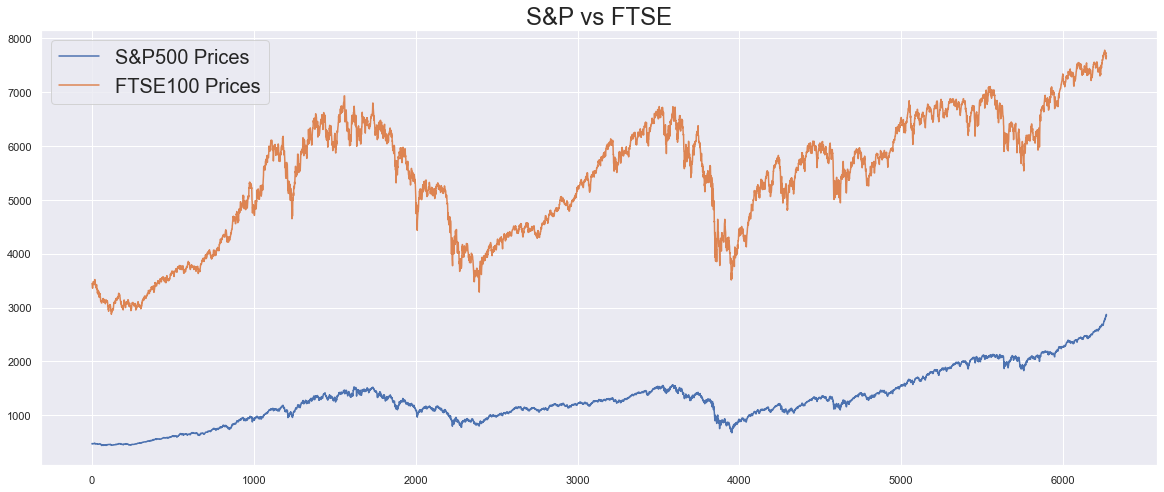

In [6]:
df.spx.plot(label = "S&P500 Prices", figsize = (20, 8))
df.ftse.plot(label = "FTSE100 Prices")
plt.title('S&P vs FTSE', size = 24)
plt.legend(fontsize = 20)
plt.show()

## Transform raw data into Time-Series Data

In [7]:
df.date = pd.to_datetime(df.date, dayfirst = True)
df.set_index('date', inplace = True)
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


### Set the desired frequency

In [8]:
df = df.asfreq('b') # 'b' - business days
df.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


## Missing values

In [9]:
df.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [10]:
df.fillna(method = 'ffill', inplace = True)
df.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

## The ACF

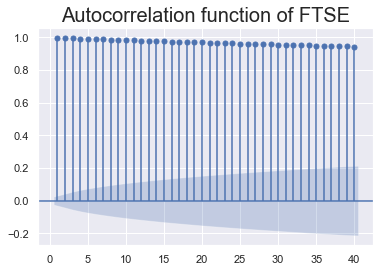

In [11]:
# ACF - autocorrelation function
import statsmodels.graphics.tsaplots as sgt

sgt.plot_acf(df.ftse, lags = 40, zero = False)
plt.title('Autocorrelation function of FTSE', size = 20)
plt.show()

## The PACF

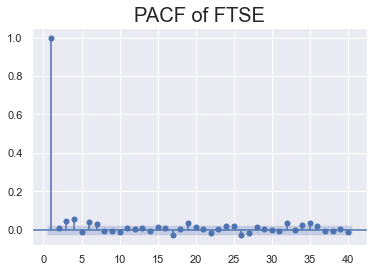

In [14]:
sgt.plot_pacf(df.ftse, lags = 40, zero = False, alpha = 0.05, method = ('ols'))
plt.title('PACF of FTSE', size = 20)
plt.show()

## AR(1) model

In [20]:
from statsmodels.tsa.arima.model import ARIMA
ar = ARIMA(df.ftse, order = (1, 0, 0)) # simple AR model
results_ar = ar.fit()
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   ftse   No. Observations:                 6277
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -34437.979
Date:                Mon, 14 Nov 2022   AIC                          68881.958
Time:                        16:25:26   BIC                          68902.192
Sample:                    01-07-1994   HQIC                         68888.968
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5423.6820    560.771      9.672      0.000    4324.592    6522.772
ar.L1          0.9990      0.001   1383.493      0.000       0.998       1.000
sigma2      3407.9483     36.199     94.145      0.000    3337.000    3478.897
===================================================================================
Ljung-Box (L1) (Q):                   0.49   Jarque-Bera (JB):              3660.69
Prob(Q):                              0.48   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                            -0.19
Prob(H) (two-sided):                  0.23   Kurtosis:                         6.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Higher-Lag AR Models

In [21]:
ar2 = ARIMA(df.ftse, order = (2, 0, 0)) # simple AR model
results_ar2 = ar2.fit()
results_ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   ftse   No. Observations:                 6277
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -34437.842
Date:                Mon, 14 Nov 2022   AIC                          68883.684
Time:                        16:31:09   BIC                          68910.663
Sample:                    01-07-1994   HQIC                         68893.032
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5423.6798    480.212     11.294      0.000    4482.482    6364.878
ar.L1          0.9902      0.009    112.935      0.000       0.973       1.007
ar.L2          0.0086      0.009      0.982      0.326      -0.009       0.026
sigma2      3407.5183     36.308     93.850      0.000    3336.356    3478.681
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3643.46
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.05   Skew:                            -0.20
Prob(H) (two-sided):                  0.24   Kurtosis:                         6.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
ar3 = ARIMA(df.ftse, order = (3, 0, 0)) # simple AR model
results_ar3 = ar3.fit()
results_ar3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   ftse   No. Observations:                 6277
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -34430.886
Date:                Mon, 14 Nov 2022   AIC                          68871.771
Time:                        16:32:39   BIC                          68905.495
Sample:                    01-07-1994   HQIC                         68883.456
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5423.6798    498.503     10.880      0.000    4446.633    6400.727
ar.L1          0.9898      0.009    112.240      0.000       0.973       1.007
ar.L2         -0.0381      0.012     -3.161      0.002      -0.062      -0.014
ar.L3          0.0471      0.008      5.699      0.000       0.031       0.063
sigma2      3400.3736     36.273     93.744      0.000    3329.280    3471.467
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              3654.68
Prob(Q):                              0.84   Prob(JB):                         0.00
Heteroskedasticity (H):               1.06   Skew:                            -0.23
Prob(H) (two-sided):                  0.20   Kurtosis:                         6.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
ar4 = ARIMA(df.ftse, order = (4, 0, 0)) # simple AR model
results_ar4 = ar4.fit()
results_ar4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   ftse   No. Observations:                 6277
Model:                 ARIMA(4, 0, 0)   Log Likelihood              -34421.768
Date:                Mon, 14 Nov 2022   AIC                          68855.536
Time:                        16:34:13   BIC                          68896.004
Sample:                    01-07-1994   HQIC                         68869.557
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5423.6798    518.609     10.458      0.000    4407.224    6440.135
ar.L1          0.9873      0.009    111.236      0.000       0.970       1.005
ar.L2         -0.0360      0.012     -2.970      0.003      -0.060      -0.012
ar.L3         -0.0063      0.011     -0.550      0.582      -0.029       0.016
ar.L4          0.0539      0.008      6.634      0.000       0.038       0.070
sigma2      3390.7236     36.932     91.811      0.000    3318.339    3463.108
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3463.72
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                            -0.27
Prob(H) (two-sided):                  0.15   Kurtosis:                         6.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [33]:
ar7 = ARIMA(df.ftse, order = (7, 0, 0)) # simple AR model
results_ar7 = ar7.fit()
results_ar7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   ftse   No. Observations:                 6277
Model:                 ARIMA(7, 0, 0)   Log Likelihood              -34414.286
Date:                Mon, 14 Nov 2022   AIC                          68846.572
Time:                        16:43:19   BIC                          68907.274
Sample:                    01-07-1994   HQIC                         68867.604
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5423.6798    548.167      9.894      0.000    4349.292    6498.068
ar.L1          0.9871      0.009    109.238      0.000       0.969       1.005
ar.L2         -0.0372      0.012     -2.996      0.003      -0.062      -0.013
ar.L3         -0.0082      0.011     -0.714      0.475      -0.031       0.014
ar.L4          0.0650      0.012      5.572      0.000       0.042       0.088
ar.L5         -0.0467      0.011     -4.157      0.000      -0.069      -0.025
ar.L6          0.0106      0.012      0.916      0.360      -0.012       0.033
ar.L7          0.0283      0.009      3.233      0.001       0.011       0.045
sigma2      3384.0371     37.041     91.360      0.000    3311.438    3456.636
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3452.85
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                            -0.29
Prob(H) (two-sided):                  0.12   Kurtosis:                         6.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
ar8 = ARIMA(df.ftse, order = (8, 0, 0)) # simple AR model
results_ar8 = ar8.fit()
results_ar8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   ftse   No. Observations:                 6277
Model:                 ARIMA(8, 0, 0)   Log Likelihood              -34414.200
Date:                Mon, 14 Nov 2022   AIC                          68848.400
Time:                        16:41:28   BIC                          68915.847
Sample:                    01-07-1994   HQIC                         68871.769
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5423.6798    550.333      9.855      0.000    4345.048    6502.312
ar.L1          0.9873      0.009    109.205      0.000       0.970       1.005
ar.L2         -0.0372      0.012     -2.988      0.003      -0.062      -0.013
ar.L3         -0.0085      0.012     -0.731      0.465      -0.031       0.014
ar.L4          0.0654      0.012      5.553      0.000       0.042       0.088
ar.L5         -0.0467      0.011     -4.159      0.000      -0.069      -0.025
ar.L6          0.0104      0.012      0.898      0.369      -0.012       0.033
ar.L7          0.0333      0.013      2.618      0.009       0.008       0.058
ar.L8         -0.0051      0.009     -0.569      0.569      -0.023       0.012
sigma2      3384.3667     37.098     91.229      0.000    3311.657    3457.077
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3446.41
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.07   Skew:                            -0.29
Prob(H) (two-sided):                  0.12   Kurtosis:                         6.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Log Likelihood Ratio (LLR) Test

In [24]:
from scipy.stats.distributions import chi2

def LLR_test(model_1, model_2, DF = 1):
    L1 = model_1.fit().llf
    L2 = model_2.fit().llf
    
    LR = 2*(L2 - L1)
    p = chi2.sf(LR, DF).round(3)
    
    return p

In [25]:
LLR_test(ar2, ar3)

0.0

In [34]:
LLR_test(ar7, ar8)

0.678

In [35]:
LLR_test(ar, ar7, DF = 6)

0.0

## The DF-Test

In [36]:
import statsmodels.tsa.stattools as sts
sts.adfuller(df.ftse)

# p-value = 0.48 (assuming a 5% significance level)
# we can assume that ftse values arer extracted from a non-stationary process

(-1.5977788921179834,
 0.4847091205465976,
 6,
 6270,
 {'1%': -3.4313933778649943,
  '5%': -2.862001080749219,
  '10%': -2.567015430304048},
 68476.87620974617)

## Using Returns

In [37]:
# create returns out of prices
# returns = (p(t) - p(t-1)) / p(t-1)
df['ftse_returns'] = df.ftse.pct_change(1).mul(100)
df = df.iloc[1:, :]

In [38]:
sts.adfuller(df.ftse_returns)

(-15.140761332034867,
 7.016338451092645e-28,
 34,
 6241,
 {'1%': -3.431398228116075,
  '5%': -2.8620032237533897,
  '10%': -2.5670165710764503},
 19026.504469066465)

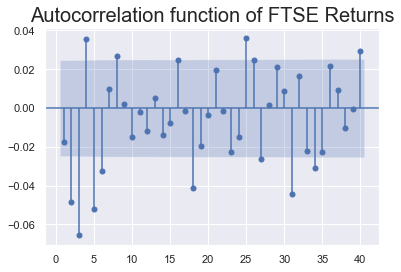

In [39]:
sgt.plot_acf(df.ftse_returns, lags = 40, zero = False)
plt.title('Autocorrelation function of FTSE Returns', size = 20)
plt.show()

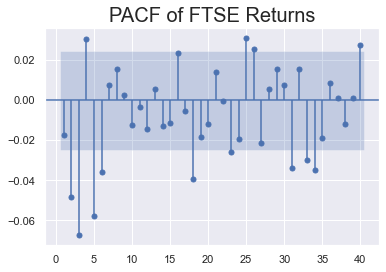

In [40]:
sgt.plot_pacf(df.ftse_returns, lags = 40, zero = False, alpha = 0.05, method = ('ols'))
plt.title('PACF of FTSE Returns', size = 20)
plt.show()

## AR(1) for Returns

In [41]:
ar1_ret = ARIMA(df.ftse_returns, order = (1, 0, 0))
res_ret_ar1 = ar1_ret.fit()
res_ret_ar1.summary()

# check p-values of Const and L1 - coeffitient values are close to 0
# our model has no predictive power

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           ftse_returns   No. Observations:                 6276
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -9597.705
Date:                Mon, 14 Nov 2022   AIC                          19201.409
Time:                        17:53:03   BIC                          19221.643
Sample:                    01-10-1994   HQIC                         19208.420
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.014      1.353      0.176      -0.009       0.047
ar.L1         -0.0176      0.007     -2.345      0.019      -0.032      -0.003
sigma2         1.2469      0.011    113.319      0.000       1.225       1.268
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             10512.45
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Higher-Lag AR model for Returns

In [42]:
ar2_ret = ARIMA(df.ftse_returns, order = (2, 0, 0))
res_ret_ar2 = ar2_ret.fit()
res_ret_ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           ftse_returns   No. Observations:                 6276
Model:                 ARIMA(2, 0, 0)   Log Likelihood               -9590.309
Date:                Mon, 14 Nov 2022   AIC                          19188.618
Time:                        17:56:17   BIC                          19215.596
Sample:                    01-10-1994   HQIC                         19197.966
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.013      1.409      0.159      -0.007       0.045
ar.L1         -0.0184      0.008     -2.432      0.015      -0.033      -0.004
ar.L2         -0.0485      0.007     -6.981      0.000      -0.062      -0.035
sigma2         1.2440      0.011    112.784      0.000       1.222       1.266
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):             10336.58
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                            -0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
LLR_test(ar1_ret, ar2_ret) # AR(2) > AR(1)

0.0

In [44]:
ar3_ret = ARIMA(df.ftse_returns, order = (3, 0, 0))
res_ret_ar3 = ar3_ret.fit()
res_ret_ar3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           ftse_returns   No. Observations:                 6276
Model:                 ARIMA(3, 0, 0)   Log Likelihood               -9575.951
Date:                Mon, 14 Nov 2022   AIC                          19161.902
Time:                        17:57:49   BIC                          19195.624
Sample:                    01-10-1994   HQIC                         19173.586
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0190      0.013      1.476      0.140      -0.006       0.044
ar.L1         -0.0217      0.008     -2.810      0.005      -0.037      -0.007
ar.L2         -0.0498      0.007     -7.201      0.000      -0.063      -0.036
ar.L3         -0.0676      0.007     -9.580      0.000      -0.081      -0.054
sigma2         1.2383      0.012    107.442      0.000       1.216       1.261
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              9353.53
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
LLR_test(ar2_ret, ar3_ret) # AR(3) > AR(2)

0.0

In [46]:
ar4_ret = ARIMA(df.ftse_returns, order = (4, 0, 0))
res_ret_ar4 = ar4_ret.fit()
res_ret_ar4.summary(), LLR_test(ar3_ret, ar4_ret)

(<class 'statsmodels.iolib.summary.Summary'>
 """
                                SARIMAX Results                                
 Dep. Variable:           ftse_returns   No. Observations:                 6276
 Model:                 ARIMA(4, 0, 0)   Log Likelihood               -9573.016
 Date:                Mon, 14 Nov 2022   AIC                          19158.032
 Time:                        17:59:15   BIC                          19198.499
 Sample:                    01-10-1994   HQIC                         19172.053
                          - 01-29-2018                                         
 Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------
 const          0.0190      0.013      1.425      0.154      -0.007       0.045
 ar.L1         -0.0197      0.008     -2.539      0.011      -0.035   

In [47]:
ar5_ret = ARIMA(df.ftse_returns, order = (5, 0, 0))
res_ret_ar5 = ar5_ret.fit()
res_ret_ar5.summary(), LLR_test(ar4_ret, ar5_ret)

(<class 'statsmodels.iolib.summary.Summary'>
 """
                                SARIMAX Results                                
 Dep. Variable:           ftse_returns   No. Observations:                 6276
 Model:                 ARIMA(5, 0, 0)   Log Likelihood               -9562.542
 Date:                Mon, 14 Nov 2022   AIC                          19139.083
 Time:                        18:00:14   BIC                          19186.295
 Sample:                    01-10-1994   HQIC                         19155.441
                          - 01-29-2018                                         
 Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------
 const          0.0190      0.013      1.499      0.134      -0.006       0.044
 ar.L1         -0.0179      0.008     -2.258      0.024      -0.033   

In [49]:
ar6_ret = ARIMA(df.ftse_returns, order = (6, 0, 0))
res_ret_ar6 = ar6_ret.fit()
res_ret_ar6.summary(), LLR_test(ar5_ret, ar6_ret)

(<class 'statsmodels.iolib.summary.Summary'>
 """
                                SARIMAX Results                                
 Dep. Variable:           ftse_returns   No. Observations:                 6276
 Model:                 ARIMA(6, 0, 0)   Log Likelihood               -9558.464
 Date:                Mon, 14 Nov 2022   AIC                          19132.928
 Time:                        18:01:13   BIC                          19186.884
 Sample:                    01-10-1994   HQIC                         19151.623
                          - 01-29-2018                                         
 Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------
 const          0.0190      0.012      1.543      0.123      -0.005       0.043
 ar.L1         -0.0200      0.008     -2.469      0.014      -0.036   

In [50]:
ar7_ret = ARIMA(df.ftse_returns, order = (7, 0, 0))
res_ret_ar7 = ar7_ret.fit()
res_ret_ar7.summary(), LLR_test(ar6_ret, ar7_ret)

(<class 'statsmodels.iolib.summary.Summary'>
 """
                                SARIMAX Results                                
 Dep. Variable:           ftse_returns   No. Observations:                 6276
 Model:                 ARIMA(7, 0, 0)   Log Likelihood               -9558.281
 Date:                Mon, 14 Nov 2022   AIC                          19134.561
 Time:                        18:01:24   BIC                          19195.261
 Sample:                    01-10-1994   HQIC                         19155.593
                          - 01-29-2018                                         
 Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
 ------------------------------------------------------------------------------
 const          0.0190      0.012      1.524      0.127      -0.005       0.043
 ar.L1         -0.0197      0.008     -2.428      0.015      -0.036   

## Normalizing of Time-Series Data

In [52]:
# x_t => % of x_1
benchmark = df.ftse.iloc[0]
df['ftse_norm'] = df.ftse.div(benchmark).mul(100)
df.head()

,spx,dax,ftse,nikkei,ftse_returns,ftse_norm
date,,,,,,
1994-01-10,475.27,2225.00,3440.58,18443.44,-0.156704,100.000000
1994-01-11,474.13,2228.10,3413.77,18485.25,-0.779229,99.220771
1994-01-12,474.17,2182.06,3372.02,18793.88,-1.222988,98.007313
1994-01-13,472.47,2142.37,3360.01,18577.26,-0.356166,97.658244
1994-01-14,474.91,2151.05,3400.56,18973.70,1.206842,98.836824


In [53]:
sts.adfuller(df.ftse_norm) # still high p-value, values are not stationary

(-1.5870996932040815,
 0.4900704664018058,
 6,
 6269,
 {'1%': -3.4313935443677157,
  '5%': -2.8620011543157835,
  '10%': -2.5670154694652805},
 24302.76353860927)

## Normalizing of Returns

In [54]:
benchmark_ret = df.ftse_returns.iloc[0]
df['ftse_returns_norm'] = df.ftse_returns.div(benchmark_ret).mul(100)
df.head()

,spx,dax,ftse,nikkei,ftse_returns,ftse_norm,ftse_returns_norm
date,,,,,,,
1994-01-10,475.27,2225.00,3440.58,18443.44,-0.156704,100.000000,100.000000
1994-01-11,474.13,2228.10,3413.77,18485.25,-0.779229,99.220771,497.260711
1994-01-12,474.17,2182.06,3372.02,18793.88,-1.222988,98.007313,780.443046
1994-01-13,472.47,2142.37,3360.01,18577.26,-0.356166,97.658244,227.285567
1994-01-14,474.91,2151.05,3400.56,18973.70,1.206842,98.836824,-770.139292


In [55]:
sts.adfuller(df.ftse_returns_norm) # this data is stationary

(-15.140761332034826,
 7.016338451093501e-28,
 34,
 6241,
 {'1%': -3.431398228116075,
  '5%': -2.8620032237533897,
  '10%': -2.5670165710764503},
 99642.30855107102)

**Normalizing does not affect stationarity**

## AR model for Normilized Returns

In [56]:
# we get the same results as for not normilized returns!
ar1_norm_ret = ARIMA(df.ftse_returns_norm, order = (1, 0, 0))
res_norm_ret_ar1 = ar1_norm_ret.fit()
res_norm_ret_ar1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      ftse_returns_norm   No. Observations:                 6276
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -50131.657
Date:                Mon, 14 Nov 2022   AIC                         100269.313
Time:                        18:16:55   BIC                         100289.547
Sample:                    01-10-1994   HQIC                        100276.324
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.1199      8.959     -1.353      0.176     -29.679       5.439
ar.L1         -0.0176      0.008     -2.346      0.019      -0.032      -0.003
sigma2      5.079e+05   4482.359    113.301      0.000    4.99e+05    5.17e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             10512.40
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                             0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [57]:
ar2_norm_ret = ARIMA(df.ftse_returns_norm, order = (2, 0, 0))
res_norm_ret_ar2 = ar2_norm_ret.fit()
res_norm_ret_ar2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      ftse_returns_norm   No. Observations:                 6276
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -50124.261
Date:                Mon, 14 Nov 2022   AIC                         100256.522
Time:                        18:18:10   BIC                         100283.500
Sample:                    01-10-1994   HQIC                        100265.869
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.1199      8.603     -1.409      0.159     -28.981       4.741
ar.L1         -0.0184      0.008     -2.430      0.015      -0.033      -0.004
ar.L2         -0.0485      0.007     -6.978      0.000      -0.062      -0.035
sigma2      5.067e+05   4493.737    112.756      0.000    4.98e+05    5.16e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):             10336.71
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [58]:
# again the same results as for not normilized returns!
ar7_norm_ret = ARIMA(df.ftse_returns_norm, order = (7, 0, 0))
res_norm_ret_ar7 = ar7_norm_ret.fit()
res_norm_ret_ar7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      ftse_returns_norm   No. Observations:                 6276
Model:                 ARIMA(7, 0, 0)   Log Likelihood              -50092.233
Date:                Mon, 14 Nov 2022   AIC                         100202.466
Time:                        18:19:46   BIC                         100263.166
Sample:                    01-10-1994   HQIC                        100223.497
                         - 01-29-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -12.1199      7.968     -1.521      0.128     -27.737       3.497
ar.L1         -0.0197      0.008     -2.427      0.015      -0.036      -0.004
ar.L2         -0.0506      0.007     -7.076      0.000      -0.065      -0.037
ar.L3         -0.0724      0.007    -10.113      0.000      -0.086      -0.058
ar.L4          0.0281      0.007      3.810      0.000       0.014       0.043
ar.L5         -0.0580      0.007     -8.142      0.000      -0.072      -0.044
ar.L6         -0.0359      0.008     -4.567      0.000      -0.051      -0.020
ar.L7          0.0077      0.008      0.961      0.336      -0.008       0.023
sigma2      5.017e+05   4800.189    104.519      0.000    4.92e+05    5.11e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              8846.79
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Residuals

In [62]:
df['residual_ftse'] = results_ar7.resid
df['residual_ftse'].mean(), df['residual_ftse'].var()

(0.7920845458224425, 3381.4132890322057)

In [63]:
sts.adfuller(df.residual_ftse)

(-79.20546814229104,
 0.0,
 0,
 6275,
 {'1%': -3.431392546147741,
  '5%': -2.8620007132681926,
  '10%': -2.567015234685164},
 68454.89807639123)

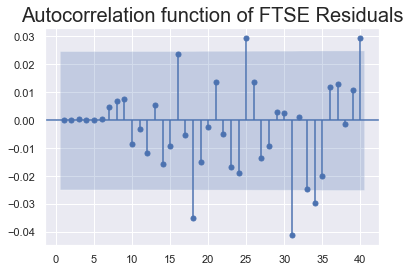

In [65]:
sgt.plot_acf(df.residual_ftse, lags = 40, zero = False)
plt.title('Autocorrelation function of FTSE Residuals', size = 20)
plt.show()

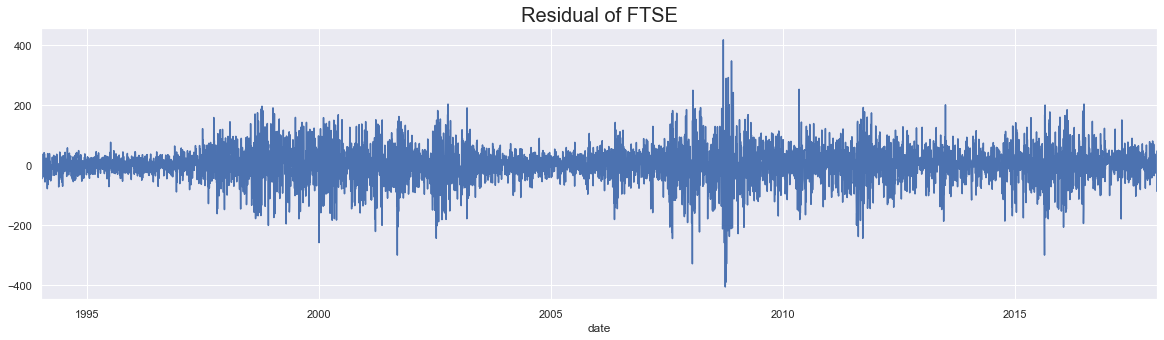

In [66]:
df.residual_ftse.plot(figsize = (20, 5))
plt.title('Residual of FTSE', size = 20)
plt.show()

## Residuals of Returns

In [67]:
df['residual_ftse_returns'] = res_ret_ar6.resid
df['residual_ftse_returns'].mean(), df['residual_ftse_returns'].var()

(-3.3705750321409655e-05, 1.231602074682843)

In [69]:
sts.adfuller(df.residual_ftse_returns)

(-14.994339710062516,
 1.1133944509180262e-27,
 34,
 6241,
 {'1%': -3.431398228116075,
  '5%': -2.8620032237533897,
  '10%': -2.5670165710764503},
 19028.245506624215)

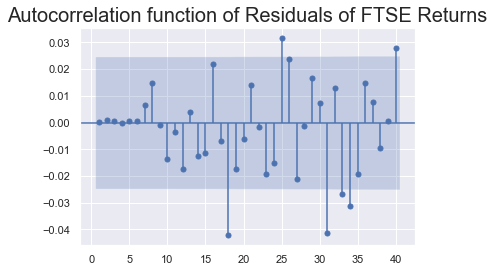

In [71]:
sgt.plot_acf(df.residual_ftse_returns, lags = 40, zero = False)
plt.title('Autocorrelation function of Residuals of FTSE Returns', size = 20)
plt.show()

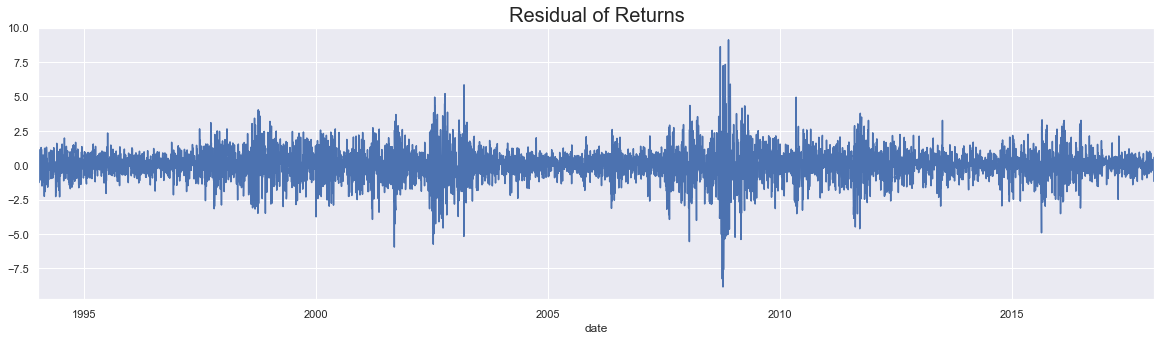

In [72]:
df.residual_ftse_returns.plot(figsize = (20, 5))
plt.title('Residual of Returns', size = 20)
plt.show()